In [1]:
import sklearn
sklearn.__version__

'0.24.2'

In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
import pandas as pd
df = pd.read_csv('train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info

<bound method DataFrame.info of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William H

In [6]:
total_passengers=len(df)
total_passengers

891

In [7]:
#step2 Calculate the number of surviving/non-surviving passengers and display it as a bar plot.
# 0=non survived, 1=survived
df[['Survived']].value_counts()

Survived
0           549
1           342
dtype: int64

In [8]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

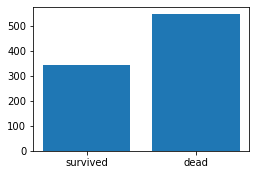

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,0.5])
names= ['survived', 'dead']
numbers= [342,549]
ax.bar(names,numbers)
plt.show()

In [10]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
total_firstclass=(df['Pclass']==1).value_counts()
total_firstclass

False    675
True     216
Name: Pclass, dtype: int64

In [12]:
# Pclass
s_class=df[['Pclass', 'Survived']].groupby('Pclass').mean()
s_class#['Survived']

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [13]:
#step3 Calculate the proportion of surviving 1st class passengers 
#with regards to the total number of 1st class passengers.

df.groupby('Pclass')['Survived'].value_counts(normalize=True)
#count()

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

In [14]:
k=s_class.iloc[0:1]
k

,Survived
Pclass,
1,0.62963


In [15]:
136/216

0.6296296296296297

In [16]:
survived_firstclass=(df[['Pclass', 'Survived']]==1).mean()
survived_firstclass

Pclass      0.242424
Survived    0.383838
dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

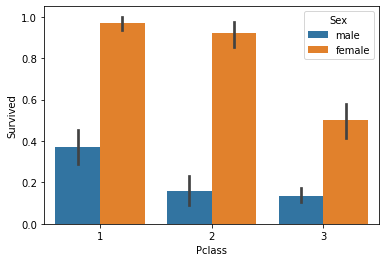

In [17]:
sns.barplot(x='Pclass', y='Survived', data=df, hue='Sex')


In [18]:
#step4 Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Number of Male and Female in df')

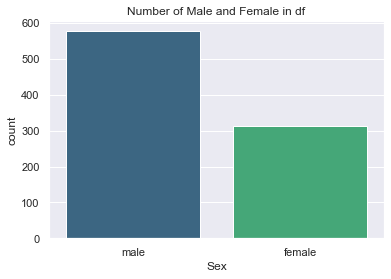

In [19]:
sns.set(font_scale=1)
sns.countplot(x='Sex',data=df,palette='viridis').set_title('Number of Male and Female in df')


Text(0.5, 1.0, '1st/2nd/3rd class in df')

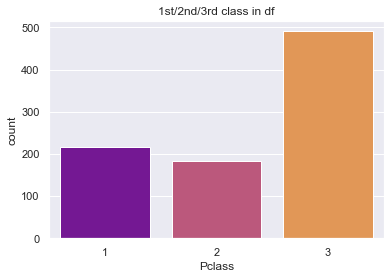

In [20]:
sns.set(font_scale=1)
sns.countplot(x='Pclass',data=df,palette='plasma').set_title('1st/2nd/3rd class in df')



<AxesSubplot:xlabel='Pclass', ylabel='count'>

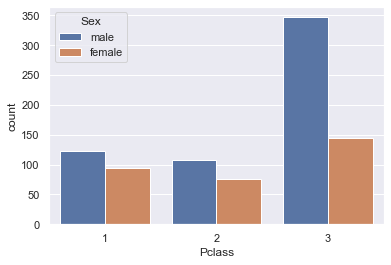

In [21]:
sns.countplot(x='Pclass', data=df, hue='Sex')

In [22]:
#step5
l_class=df[['Age']].count()
l_class

Age    714
dtype: int64

In [23]:
kk_class=df[['Age','Survived']].value_counts()
kk_class

Age   Survived
21.0  0           19
28.0  0           18
18.0  0           17
25.0  0           17
22.0  0           16
                  ..
36.5  0            1
37.0  1            1
43.0  1            1
47.0  1            1
80.0  1            1
Length: 142, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

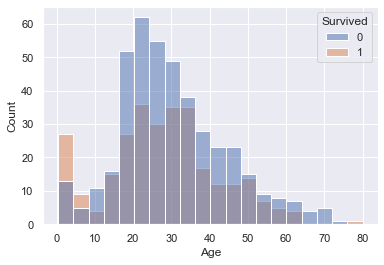

In [24]:
#Step6
#Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.
sns.histplot( x='Age', hue='Survived', data=df)

In [25]:
#step6 Calculate the average age for survived and drowned passengers separately.
#titanic_surv_age =train_df[['Survived']==1, 'Age']].mean()
#train_df[['Age','Survived']].mean()
df.loc[df['Survived']==1,:]['Age'].mean()


28.343689655172415

In [26]:
df.loc[df['Survived']==0,:].groupby('Age')['Survived'].mean()

Age
1.0     0.0
2.0     0.0
3.0     0.0
4.0     0.0
6.0     0.0
       ... 
66.0    0.0
70.0    0.0
70.5    0.0
71.0    0.0
74.0    0.0
Name: Survived, Length: 77, dtype: float64

In [27]:
#step 7 Replace missing age values by the mean age.
from sklearn.impute import SimpleImputer
#1st version
#imputer = SimpleImputer(strategy='most_frequent')
#imputer.fit(df[['Age']])        
#imputer.transform(df[['Age']])  
#2nd version
mean_age=df['Age'].mean()
df.fillna(mean_age,inplace=True)
df.tail()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.00,29.699118,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.45,29.699118,S
890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.000000,0,0,370376,7.75,29.699118,Q


In [28]:
#step8 Create a table counting the number of surviving/dead passengers separately 
#for 1st/2nd/3rd class and male/female

#1st version (long)
dead_class_1_male=df[(df['Survived']==0)&(df['Pclass']==1)&(df['Sex']=='male')].shape[0]
dead_class_2_male=df[(df['Survived']==0)&(df['Pclass']==2)&(df['Sex']=='male')].shape[0]
dead_class_3_male=df[(df['Survived']==0)&(df['Pclass']==3)&(df['Sex']=='male')].shape[0]
dead_class_1_female=df[(df['Survived']==0)&(df['Pclass']==1)&(df['Sex']=='female')].shape[0]
dead_class_2_female=df[(df['Survived']==0)&(df['Pclass']==2)&(df['Sex']=='female')].shape[0]
dead_class_3_female=df[(df['Survived']==0)&(df['Pclass']==3)&(df['Sex']=='female')].shape[0]
survived_class_1_male=df[(df['Survived']==1)&(df['Pclass']==1)&(df['Sex']=='male')].shape[0]
survived_class_2_male=df[(df['Survived']==1)&(df['Pclass']==2)&(df['Sex']=='male')].shape[0]
survived_class_3_male=df[(df['Survived']==1)&(df['Pclass']==3)&(df['Sex']=='male')].shape[0]
survived_class_1_female=df[(df['Survived']==1)&(df['Pclass']==1)&(df['Sex']=='female')].shape[0]
survived_class_2_female=df[(df['Survived']==1)&(df['Pclass']==2)&(df['Sex']=='female')].shape[0]
survived_class_3_female=df[(df['Survived']==1)&(df['Pclass']==3)&(df['Sex']=='female')].shape[0]


In [29]:
#2nd version
df.pivot_table(index=['Survived','Sex'], columns=['Pclass'])

Age                              Fare             \
Pclass                   1          2          3           1          2   
Survived Sex                                                              
0        female  25.666667  36.000000  25.206736  110.604167  18.250000   
         male    41.489427  33.086745  27.948083   62.894910  19.488965   
1        female  34.420792  28.127118  22.930249  105.978159  22.288989   
         male    35.520346  17.631073  23.696001   74.637320  21.095100   

                               Parch                         SibSp            \
Pclass                   3         1         2         3         1         2   
Survived Sex                                                                   
0        female  19.773093  1.333333  0.166667  1.097222  0.666667  0.500000   
         male    12.204469  0.259740  0.142857  0.213333  0.272727  0.307692   
1        female  12.464526  0.428571  0.642857  0.500000  0.549451  0.485714   
         male    15.579696  0.311111  0.647059  0.297872  0.377778  0.529412   

                           
Pclass                  3  
Survived Sex               
0        female  1.291667  
         male    0.523333  
1        female  0.500000  
         male    0.340426

In [30]:
df.groupby(['Survived','Sex'])['Pclass'].value_counts()

Survived  Sex     Pclass
0         female  3          72
                  2           6
                  1           3
          male    3         300
                  2          91
                  1          77
1         female  1          91
                  3          72
                  2          70
          male    3          47
                  1          45
                  2          17
Name: Pclass, dtype: int64

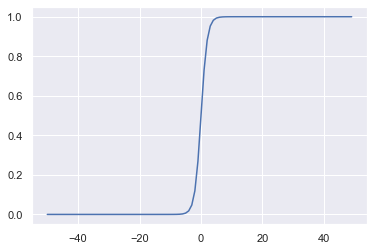

In [31]:
#to see
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create the sigmoid function
def sigmoid_function(f):
    '''Calculates p for given f'''
    p = 1 / (1 + np.exp(-f))
    return p

# create the logit function
def logit_function(x, b, w):
    '''Calculates the border'''
    f = b + w*x
    return f

b = 0
w = 1
x = np.arange(-50, 50, 1)
f = logit_function(x, b, w)
p = sigmoid_function(f)

plt.plot(x,p) 
plt.show()


In [32]:
#Build Logistic Regression Model-starting with Pclass 
# Define independent variable/ initial features
X =df[['Pclass']]
#df.drop('Pclass', axis=1) 

# Define output target variable
y=df['Survived'] 
#y=df[['Survived']] 

In [33]:
# Train-test split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25, random_state=15)

In [34]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [35]:
#df[df['Pclass'].isna()]

In [36]:
Xtrain.shape,Xtest.shape

((668, 1), (223, 1))

In [37]:
ytrain.shape, ytest.shape

((668,), (223,))

In [38]:
df['Pclass'].unique()

array([3, 1, 2])

In [39]:
y = df['Survived']
y.shape

(891,)

In [40]:
y, type(y)

(PassengerId
 1      0
 2      1
 3      1
 4      1
 5      0
       ..
 887    0
 888    1
 889    0
 890    1
 891    0
 Name: Survived, Length: 891, dtype: int64,
 pandas.core.series.Series)

In [41]:
X, type(X)

(             Pclass
 PassengerId        
 1                 3
 2                 1
 3                 3
 4                 1
 5                 3
 ...             ...
 887               2
 888               1
 889               3
 890               1
 891               3
 
 [891 rows x 1 columns],
 pandas.core.frame.DataFrame)

In [42]:
df_train = pd.concat([Xtrain, ytrain], axis = 1)#just to see

In [43]:
df_train.head()

,Pclass,Survived
PassengerId,,
322,3,0
85,2,1
634,1,0
402,3,0
669,3,0


In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
m = LogisticRegression()

In [46]:
m.fit(Xtrain, ytrain)


LogisticRegression()

In [47]:
m.score(Xtrain,ytrain).round(2)

0.68

In [48]:
m.score(Xtest, ytest)#to see
f'{100*round(m.score(Xtest, ytest),2)}'

'67.0'

In [49]:
w=m.coef_
w

array([[-0.76125398]])

In [50]:
b = m.intercept_
b

array([1.19587507])

In [51]:
#Evaluate the model
m.predict(Xtest)

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1])

In [52]:
prob = m.predict_proba(Xtest)#First 10 samples
prob[0:10]

array([[0.3930234 , 0.6069766 ],
       [0.58093988, 0.41906012],
       [0.7479836 , 0.2520164 ],
       [0.3930234 , 0.6069766 ],
       [0.58093988, 0.41906012],
       [0.7479836 , 0.2520164 ],
       [0.58093988, 0.41906012],
       [0.7479836 , 0.2520164 ],
       [0.3930234 , 0.6069766 ],
       [0.3930234 , 0.6069766 ]])

In [53]:
from sklearn.metrics import accuracy_score 

In [54]:
ypred = m.predict(Xtest) # generating predictive results
accuracy_score(ytest,ypred).round(2) # compare predictive results to actual results

0.67

In [56]:
m.predict([[100]])

array([0])

In [57]:
m.classes_

array([0, 1])

In [58]:
ypred_probabilities=m.predict_proba(Xtest)

In [59]:
#changing threshold to 0.9
ypred_for_p0_9 = []
for i in ypred_probabilities[:,1]:
    if i < 0.9:
        ypred_for_p0_9.append(0)
    else:
        ypred_for_p0_9.append(1)
print("Accuracy for threshold p=0.9:", round(accuracy_score(ytest, ypred_for_p0_9),3))

Accuracy for threshold p=0.9: 0.57


In [60]:
probs = pd.DataFrame(data=m.predict_proba(Xtest), columns=m.classes_)#I want to create dataframe;there is no one way to Rome
#the same  output as above ypred_probabilities
probs

,0,1
0,0.393023,0.606977
1,0.580940,0.419060
2,0.747984,0.252016
3,0.393023,0.606977
4,0.580940,0.419060
...,...,...
218,0.393023,0.606977
219,0.393023,0.606977
220,0.393023,0.606977
221,0.747984,0.252016


In [61]:
probs['new_treshold'] = 0.9#to see how it runs
probs.head()

,0,1,new_treshold
0,0.393023,0.606977,0.9
1,0.580940,0.419060,0.9
2,0.747984,0.252016,0.9
3,0.393023,0.606977,0.9
4,0.580940,0.419060,0.9


In [62]:
probs['new_prediction']=(probs[1]>probs['new_treshold']).astype('int')
probs.head()#predicts 0 like in for loop above

,0,1,new_treshold,new_prediction
0,0.393023,0.606977,0.9,0
1,0.580940,0.419060,0.9,0
2,0.747984,0.252016,0.9,0
3,0.393023,0.606977,0.9,0
4,0.580940,0.419060,0.9,0


In [63]:
#Changing threshold to 0.1
ypred_for_p0_1 = []
for i in ypred_probabilities[:,1]:
    if i < 0.1:
        ypred_for_p0_1.append(0)
    else:
        ypred_for_p0_1.append(1)
print("Accuracy for threshold p=0.9:", round(accuracy_score(ytest, ypred_for_p0_1),3))

Accuracy for threshold p=0.9: 0.43


In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [66]:
# Create Features using OneHot Encoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

In [67]:
X1=df
# Train-test split 
X1train, X1test, ytrain, ytest = train_test_split(X1,y,test_size=0.25, random_state=15)
#m1 = LogisticRegression()
# m1.fit(Xtrain, ytrain)

In [68]:
#Define proceeding for numerical columns
cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse=False, handle_unknown='ignore'))

In [69]:
num_pipe=make_pipeline( MinMaxScaler())

In [70]:
X1train['Embarked'].unique()

array(['S', 'C', 'Q', 29.69911764705882], dtype=object)

In [71]:
ct=ColumnTransformer([
    #('do_nothing', 'passthrough', ['PassengerId']),
    ('cat_preprocessing', cat_pipe, ['Sex']),
    ('num_preprocessing', num_pipe, ['Pclass']),
    ('median_imputer', SimpleImputer(strategy='median'), ['Age']),
],remainder='drop')
ct

ColumnTransformer(transformers=[('cat_preprocessing',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Sex']),
                                ('num_preprocessing',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Pclass']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'), ['Age'])])

In [92]:
ct.fit(X1train)
#trans.fit(Xtrain)

ColumnTransformer(transformers=[('cat_preprocessing',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Sex']),
                                ('num_preprocessing',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Pclass']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'), ['Age'])])

In [73]:
                 
Xtrain_fe = ct.transform(X1train)  #train my model

In [74]:
ypred_fe = ct.transform(X1test)  # DataFrame for prediction

In [75]:
ct.fit(X1train,ytrain)

ColumnTransformer(transformers=[('cat_preprocessing',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Sex']),
                                ('num_preprocessing',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Pclass']),
                                ('median_imputer',
                                 SimpleImputer(strategy='median'), ['Age'])])

In [76]:
df2=X1train
df2

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
322,0,3,"Danoff, Mr. Yoto",male,27.000000,0,0,349219,7.8958,29.699118,S
85,1,2,"Ilett, Miss. Bertha",female,17.000000,0,0,SO/C 14885,10.5000,29.699118,S
634,0,1,"Parr, Mr. William Henry Marsh",male,29.699118,0,0,112052,0.0000,29.699118,S
402,0,3,"Adams, Mr. John",male,26.000000,0,0,341826,8.0500,29.699118,S
669,0,3,"Cook, Mr. Jacob",male,43.000000,0,0,A/5 3536,8.0500,29.699118,S
...,...,...,...,...,...,...,...,...,...,...,...
385,0,3,"Plotcharsky, Mr. Vasil",male,29.699118,0,0,349227,7.8958,29.699118,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
646,1,1,"Harper, Mr. Henry Sleeper",male,48.000000,1,0,PC 17572,76.7292,D33,C


In [77]:
df2_1=df2.drop(['Name','Embarked','Sex','Ticket','Cabin','Survived'], axis=1)
df2_1


,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
322,3,27.000000,0,0,7.8958
85,2,17.000000,0,0,10.5000
634,1,29.699118,0,0,0.0000
402,3,26.000000,0,0,8.0500
669,3,43.000000,0,0,8.0500
...,...,...,...,...,...
385,3,29.699118,0,0,7.8958
888,1,19.000000,0,0,30.0000
646,1,48.000000,1,0,76.7292


In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [80]:
#Xt= df[['Pclass', 'Age']]
#yt=df['Survived']

In [81]:
m1= DecisionTreeClassifier(max_depth=3)  


In [82]:
df2_1.shape


(668, 5)

In [83]:
y.shape

(891,)

In [84]:
#df.drop(df.tail(n).index,inplace=True)
#y = y.reshape(y.shape[:1])
y1=y.tail(-223)

In [85]:
y1.shape

(668,)

In [86]:
m1 = RandomForestClassifier(max_depth=2,n_estimators=10)  # n_estimators is the number of decision trees

m1.fit(df2_1,y1)

RandomForestClassifier(max_depth=2, n_estimators=10)

In [87]:
y1pred1 = m1.predict(df2_1)

In [88]:
round(accuracy_score(y1pred1, y1), 3)

0.612

In [89]:
#train-split work
df2_1train, df2_1test, y1train, y1test = train_test_split(df2_1,y1,test_size=0.25, random_state=15)

In [90]:
df2_1train

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
225,1,38.000000,1,0,90.0000
728,3,29.699118,0,0,7.7375
471,3,29.699118,0,0,7.2500
542,3,9.000000,4,2,31.2750
182,2,29.699118,0,0,15.0500
...,...,...,...,...,...
763,3,20.000000,0,0,7.2292
592,1,52.000000,1,0,78.2667
704,3,25.000000,0,0,7.7417


In [91]:
df2_1test

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
554,3,22.000000,0,0,7.2250
468,1,56.000000,0,0,26.5500
765,3,16.000000,0,0,7.7750
834,3,23.000000,0,0,7.8542
764,1,36.000000,1,2,120.0000
...,...,...,...,...,...
213,3,22.000000,0,0,7.2500
541,1,36.000000,0,2,71.0000
350,3,42.000000,0,0,8.6625
